In [ ]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()

a_renomear = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado'
}
dados = dados.rename(columns = a_renomear)
dados.head()



,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


primeiro importamos a uri que vem em um dataframe, logo em seguiddas a gnt renomeia as features em portugues usando dicionario, uma vez que esta tudo em ingles

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


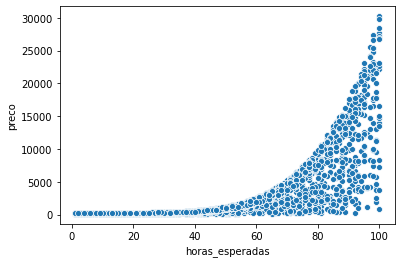

In [ ]:
troca = {
    0 : 1,
    1 : 0
}
dados['finalizado'] = dados.nao_finalizado.map(troca)
dados.head()

dados.tail()

import seaborn as sns

sns.scatterplot(x="horas_esperadas", y="preco", data=dados)

trocamos a feature nao finalizado para finalizado, para uma melhor interpretacao grafica. e plotamos em horas esperadas x preco


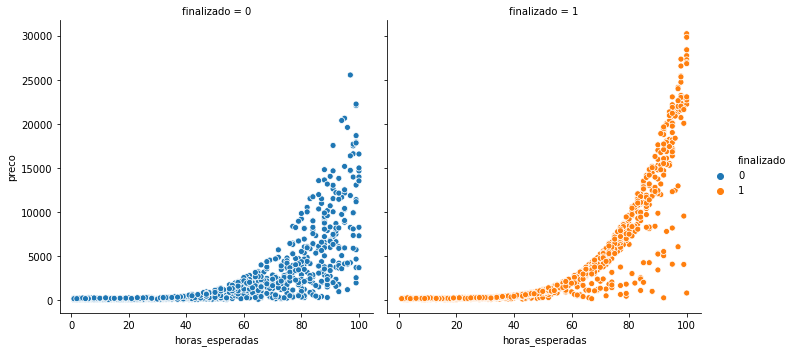

In [ ]:

from seaborn import relplot

relplot(x="horas_esperadas",y= "preco",hue = "finalizado", col = "finalizado", data=dados) #joga no google colab que da certo


plotamos separadamente oque foi finalizado e oq nao foi finalizado

In [ ]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']


divisao entre as features e oque vai ser predito


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

#SEED = 5
#np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))


Treinaremos com 1617 elementos e testaremos com 540 elementos


aqui a gente divide em testes e treinos alem de importar os pacotes a serem usados

In [ ]:
modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)


A acurácia foi 55.37%


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Usamos o pacote para adaptar o modelo que no caso eh linear e a maquina treina com os dados para poder predizer algo, em seguida predizemos emm cima dos dados e calculamos uma taxa de acerto do algoritmo


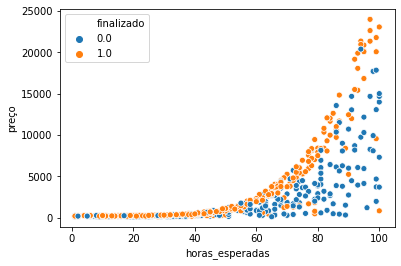

In [ ]:
scatterplot(x="horas_esperadas",y= "preço",hue = teste_y, data=dados) #grafico do teste
# o algoritmo tem que aprender a logica dessa curva


Oque vamos fazer agora, é preencher varios pontos ao longo do plano, para ver onde está o erro do algoritmo


In [ ]:

x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
print(y_min,y_max)


100 27738


vamos agr distribuir 100 pontos pelos eixos  o meshgrid transforma o vetor eixo_x em uma matriz com linhas iguais ao vetor para preencher o grafico

In [ ]:
import numpy as np

pixels = 100
eixo_x = np.arange(x_min,x_max,(x_max - x_min)/pixels) #criando 100 pontos distribuidos
eixo_y = np.arange(y_min,y_max,(y_max -y_min)/pixels)
eixo_x
xx , yy = np.meshgrid(eixo_x,eixo_y)
xx 
#yy

array([[ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       ...,
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01]])

In [ ]:
pontos = np.c_[xx.ravel(), yy.ravel()] #fez duplas de x e y
pontos

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.375111e+04],
       [9.802000e+01, 2.375111e+04],
       [9.901000e+01, 2.375111e+04]])

agr modelamos Z para poder plotar e comparar com o teste

In [ ]:
Z = modelo.predict(pontos) #modelo predizendo a partir dos pontos dados
#Z tem dimensao 10000 enquanto o X era 100 x 100
Z = Z.reshape(xx.shape) #deixando z em 100x100
Z



array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

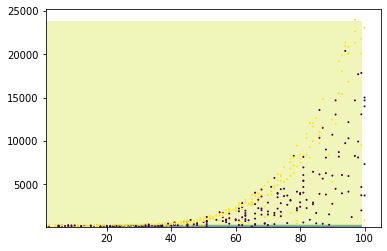

In [ ]:
plt.contourf(xx,yy,Z,alpha=0.3 ) #a curva esta la embaixo , ele chutou que vai finalizar tudo horrrivel
plt.scatter(teste_x.horas_esperadas, teste_x.preço, c=teste_y, s = 1) # x ,y,cor,size 


basicamente nesse final, a gnt encheu de pontos o plano e preveu em cima disso, conseguimos assim notar que o algoritmo esta viesado, ja que a curva eh uma reta quase invisivel, uma vez que o algoritmo aceita que tudo eh finalizado.


Como se trata de uma curva e nao de uma reta, vamos tentar usar o SVC apenas e nao  o LinearSVC. Copiando todo o codigo abaixo denovo


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 55.19%


a acuracia nao melhora muito, mas vamos plotar para entender oq esta acontecendo

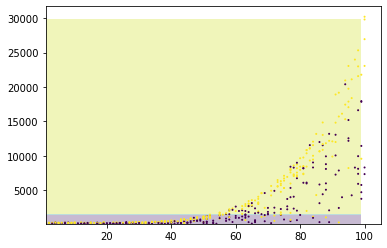

In [ ]:

x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)


Percebemos que o erro esta na escala, o eixo x tem escala muito menor que o y e por isso o algoritmo nao esta funcionando

Entao vamos utilizar uma biblioteca que iguala a escala pra gente, ajudando a produzir um algoritmo e uma curva mais precisa, para isso chamamos as variaveis anteriores de valores crus(raw) e depois adequamos a escala

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)
modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)


Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 66.85%


Como usamos o pacote para iguaalar a escala, o teste_x se tornou uma matriz bidimensional e temos que quebra la em dois veetor para conseguir plotar que nem antes

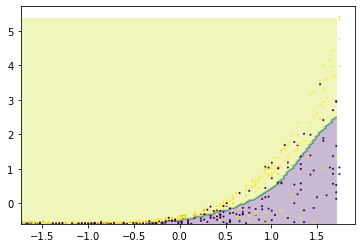

In [ ]:
data_x = teste_x[:,0] #todas as linhas e soh primeira coluna
data_y = teste_x[:,1] #todas as linhas e soh segunda coluna
x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=1)

# DECISION BOUNDARY

logo o algoritmo aprendeu direitinho como a curva se comporta